# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city, units set to metric
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    response_json = response.json()
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response_json['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp_max']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sandnessjoen
Processing Record 2 of Set 1 | madinat ash shamal
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | palafrugell
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | elverum
Processing Record 9 of Set 1 | zhezqazghan
Processing Record 10 of Set 1 | muscatine
Processing Record 11 of Set 1 | nguigmi
Processing Record 12 of Set 1 | el calafate
Processing Record 13 of Set 1 | freetown
Processing Record 14 of Set 1 | haugesund
Processing Record 15 of Set 1 | kirensk
Processing Record 16 of Set 1 | ust-tsilma
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | maihar
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | mount gambier
Proces

City not found. Skipping...
Processing Record 41 of Set 4 | gadzhiyevo
Processing Record 42 of Set 4 | vernon
Processing Record 43 of Set 4 | khandyga
Processing Record 44 of Set 4 | porto novo
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | saint-joseph
Processing Record 47 of Set 4 | santa barbara
Processing Record 48 of Set 4 | udachny
Processing Record 49 of Set 4 | polyarnyy
Processing Record 0 of Set 5 | laguna
Processing Record 1 of Set 5 | hermanus
Processing Record 2 of Set 5 | saldanha
Processing Record 3 of Set 5 | matoury
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | point pedro
Processing Record 6 of Set 5 | namtsy
Processing Record 7 of Set 5 | mariental
Processing Record 8 of Set 5 | mirny
Processing Record 9 of Set 5 | dawson creek
Processing Record 10 of Set 5 | newnham
Processing Record 11 of Set 5 | umluj
Processing Record 12 of Set 5 | walvis bay
Processing Record 13 of Set 5 | hohr-grenzhausen
Processing Record 14 of Se

Processing Record 36 of Set 8 | cooper's town
Processing Record 37 of Set 8 | ola
Processing Record 38 of Set 8 | gouloure
Processing Record 39 of Set 8 | alaghsas
Processing Record 40 of Set 8 | swakopmund
Processing Record 41 of Set 8 | smarhon
Processing Record 42 of Set 8 | brisas de zicatela
Processing Record 43 of Set 8 | saudarkrokur
Processing Record 44 of Set 8 | yeed
Processing Record 45 of Set 8 | acapulco de juarez
Processing Record 46 of Set 8 | tromso
Processing Record 47 of Set 8 | luba
Processing Record 48 of Set 8 | fort smith
Processing Record 49 of Set 8 | rexburg
Processing Record 0 of Set 9 | federal
Processing Record 1 of Set 9 | kalmunai
Processing Record 2 of Set 9 | bonthe
Processing Record 3 of Set 9 | sonsorol village
City not found. Skipping...
Processing Record 4 of Set 9 | irymple
Processing Record 5 of Set 9 | tangalle
Processing Record 6 of Set 9 | turar ryskulov
Processing Record 7 of Set 9 | erdenet
Processing Record 8 of Set 9 | kavaratti
Processing R

Processing Record 21 of Set 12 | pico truncado
Processing Record 22 of Set 12 | leava
Processing Record 23 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 24 of Set 12 | thunder bay
Processing Record 25 of Set 12 | cidreira
Processing Record 26 of Set 12 | kourou
Processing Record 27 of Set 12 | sidareja
Processing Record 28 of Set 12 | san antonio
Processing Record 29 of Set 12 | kimbe
Processing Record 30 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 31 of Set 12 | uglekamensk
Processing Record 32 of Set 12 | puerto baquerizo moreno
Processing Record 33 of Set 12 | apan
Processing Record 34 of Set 12 | sengkang
-----------------------------
Data Retrieval Complete      
-----------------------------


In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sandnessjoen,66.0217,12.6316,9.12,93,75,6.17,NO,1696352525
1,madinat ash shamal,26.1293,51.2009,31.84,65,0,3.75,QA,1696352526
2,invercargill,-46.4000,168.3500,7.89,55,99,3.72,NZ,1696352526
3,west island,-12.1568,96.8225,24.99,69,83,7.20,CC,1696352527
4,nova sintra,14.8667,-24.7167,23.83,75,75,1.72,CV,1696352528


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sandnessjoen,66.0217,12.6316,9.12,93,75,6.17,NO,1696352525
1,madinat ash shamal,26.1293,51.2009,31.84,65,0,3.75,QA,1696352526
2,invercargill,-46.4000,168.3500,7.89,55,99,3.72,NZ,1696352526
3,west island,-12.1568,96.8225,24.99,69,83,7.20,CC,1696352527
4,nova sintra,14.8667,-24.7167,23.83,75,75,1.72,CV,1696352528


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

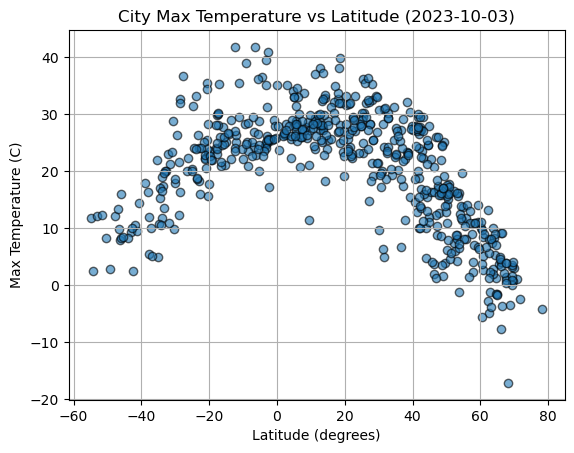

In [56]:
# Convert unix UTC date from 'Date' column to readable date (tuple)
# from https://www.geeksforgeeks.org/fromtimestamp-function-of-datetime-date-class-in-python/
city_date = datetime.date.fromtimestamp(city_data_df.iloc[0,8])

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
           alpha = 0.60, edgecolor = "black"
           )

# Incorporate the other graph properties
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Temperature vs Latitude (%s)"%city_date)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

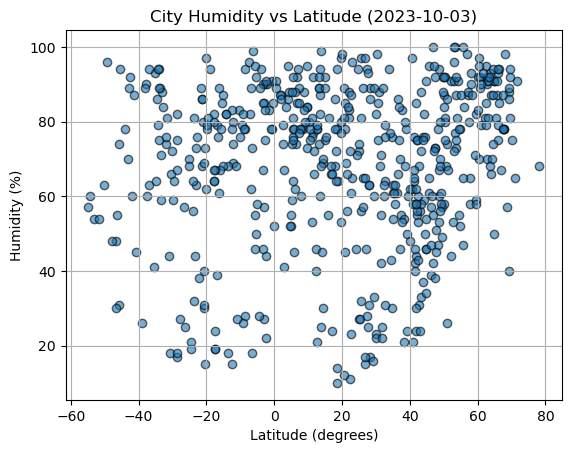

In [57]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],
           alpha = 0.60, edgecolor = "black"
           )

# Incorporate the other graph properties
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs Latitude (%s)"%city_date)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

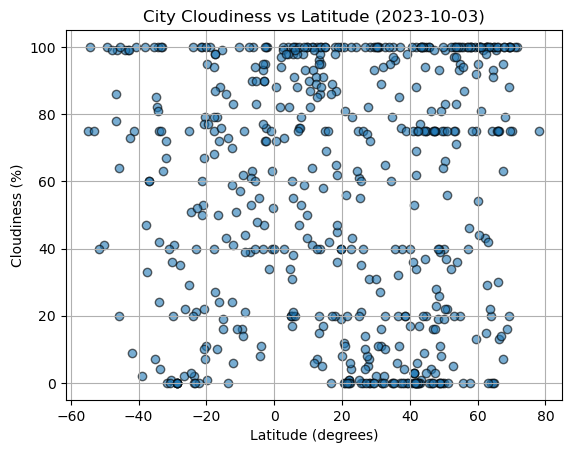

In [58]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
           alpha = 0.60, edgecolor = "black"
           )

# Incorporate the other graph properties
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title("City Cloudiness vs Latitude (%s)"%city_date)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

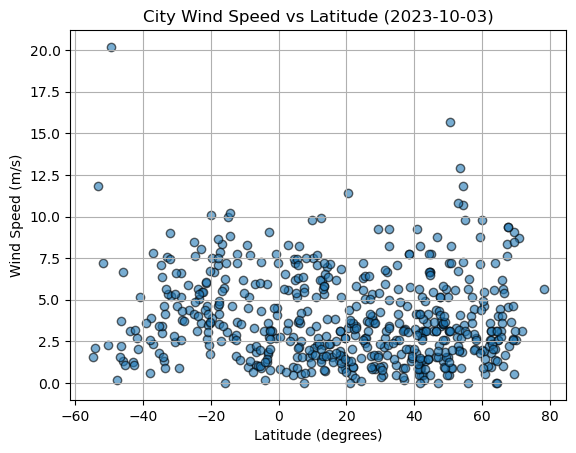

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
           alpha = 0.60, edgecolor = "black"
           )

# Incorporate the other graph properties
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Wind Speed vs Latitude (%s)"%city_date)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def plot_linreg(x_values, y_values, y_label, text_coord):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create Plot
    plt.scatter(x_values,y_values)
    # Label plot and annotate the line equation
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coord,fontsize=15,color="red")
    plt.xlabel('Latitude (degrees)')
    plt.ylabel(y_label)
    # Print r value
    print(f'The r value is {rvalue}')
    
    # Show plot
    plt.show()

In [61]:
city_data_df.loc[city_data_df['Lat']>= 0, :]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sandnessjoen,66.0217,12.6316,9.12,93,75,6.17,NO,1696352525
1,madinat ash shamal,26.1293,51.2009,31.84,65,0,3.75,QA,1696352526
4,nova sintra,14.8667,-24.7167,23.83,75,75,1.72,CV,1696352528
5,palafrugell,41.9174,3.1631,26.46,44,88,0.45,ES,1696352528
6,tiksi,71.6872,128.8694,-2.34,91,100,3.09,RU,1696352529


In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sandnessjoen,66.0217,12.6316,9.12,93,75,6.17,NO,1696352525
1,madinat ash shamal,26.1293,51.2009,31.84,65,0,3.75,QA,1696352526
4,nova sintra,14.8667,-24.7167,23.83,75,75,1.72,CV,1696352528
5,palafrugell,41.9174,3.1631,26.46,44,88,0.45,ES,1696352528
6,tiksi,71.6872,128.8694,-2.34,91,100,3.09,RU,1696352529


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,invercargill,-46.4000,168.3500,7.89,55,99,3.72,NZ,1696352526
3,west island,-12.1568,96.8225,24.99,69,83,7.20,CC,1696352527
11,el calafate,-50.3408,-72.2768,8.21,63,41,2.30,AR,1696352532
17,fale old settlement,-9.3852,-171.2468,28.27,79,16,8.27,TK,1696352535
20,grytviken,-54.2811,-36.5092,2.47,60,100,2.09,GS,1696352537


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8059711991012347


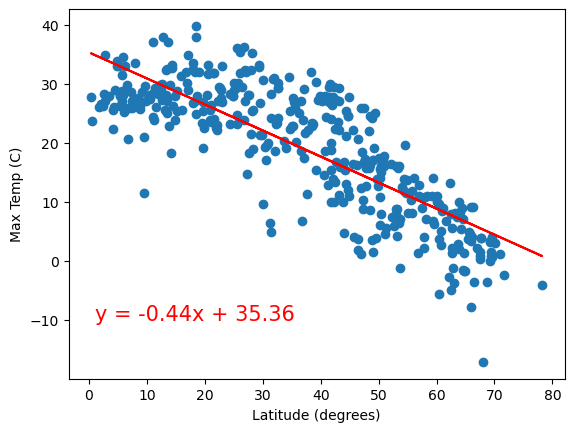

In [73]:
# Linear regression on Northern Hemisphere
plot_linreg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 'Max Temp (C)', (1, -10))

The r value is 0.7291569595303151


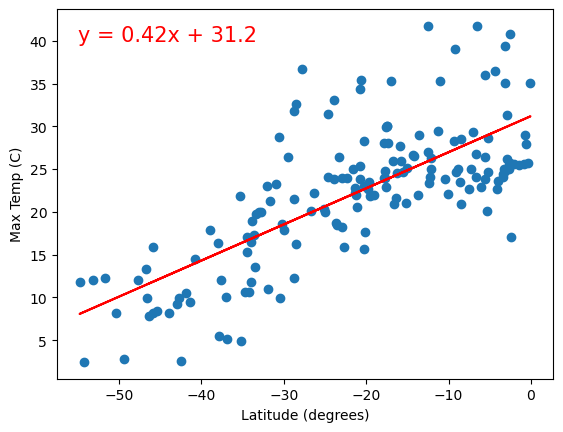

In [76]:
# Linear regression on Southern Hemisphere
plot_linreg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], 'Max Temp (C)', (-55, 40))

**Discussion about the linear relationship:**
- For the northern hemisphere plot, the r-value strongly suggests a negative correlation between the city's max temperature and its latitude (inverse relationship).  In other words, the further the city is located from the equator (0 degrees), the maximum temperature decreases.
- Similarly with the southern hemisphere plot, the r-value strongly suggests a positive correlation between the city's max temperature and its latitude (direct relationship).

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.1065271602818943


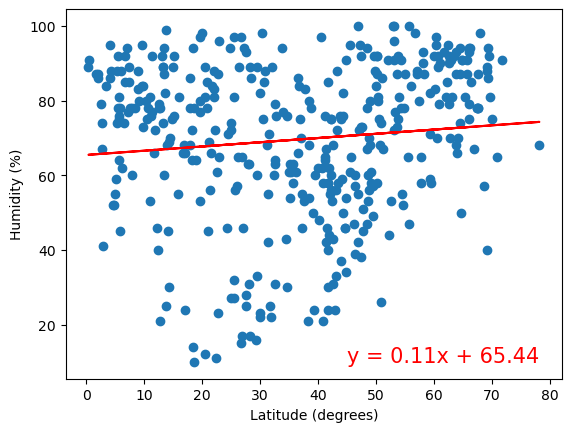

In [78]:
# Northern Hemisphere
plot_linreg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], 'Humidity (%)', (45, 10))

The r value is 0.06354897058549946


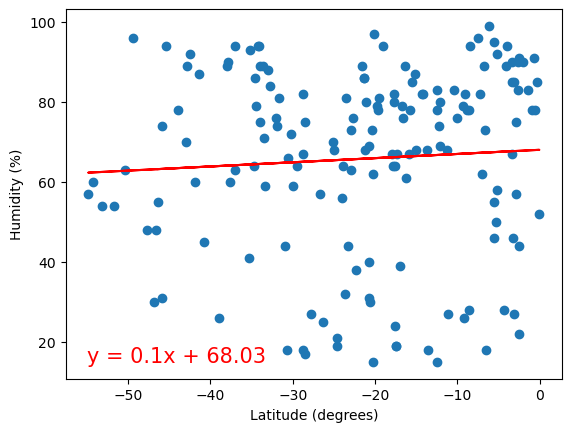

In [80]:
# Southern Hemisphere
plot_linreg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], 'Humidity (%)', (-55, 15))

**Discussion about the linear relationship:**
- With the given r-values for both hemispheres (absolute value < 0.3), there is little to no correlation between the city's humidity and its latitude (at least during this part of the year).

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.01202038276076918


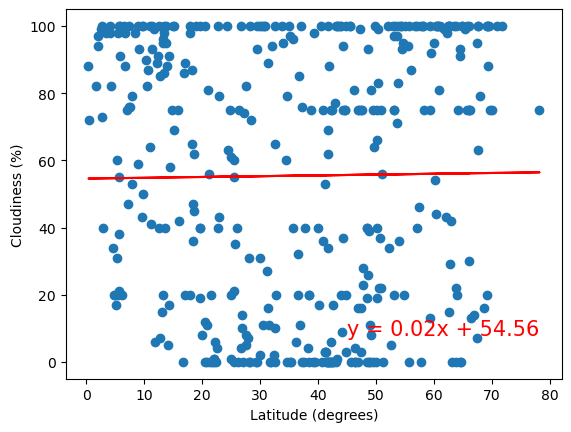

In [82]:
# Northern Hemisphere
plot_linreg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], 'Cloudiness (%)', (45, 8))

The r value is -0.006745489143375374


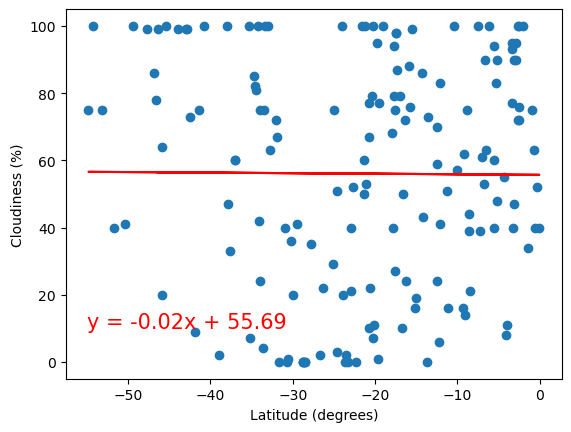

In [85]:
# Southern Hemisphere
plot_linreg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], 'Cloudiness (%)', (-55, 10))

**Discussion about the linear relationship:**
- The 'Cloudiness' plots are similar to the 'Humidity' plots for both hemispheres.  Since the r-values are almost 0, there is no correlation between a city's cloudiness and its latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.04048189899364572


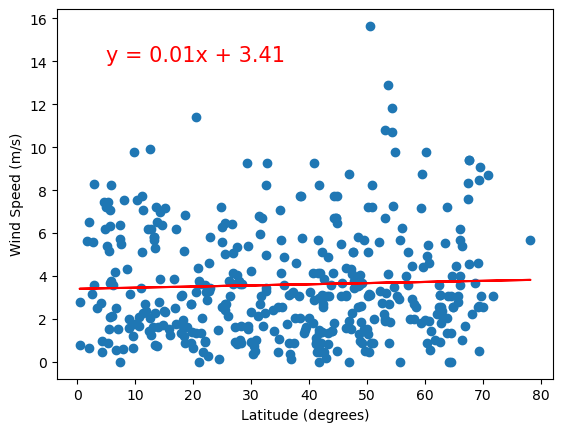

In [87]:
# Northern Hemisphere
plot_linreg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], 'Wind Speed (m/s)', (5, 14))

The r value is -0.06436147872294028


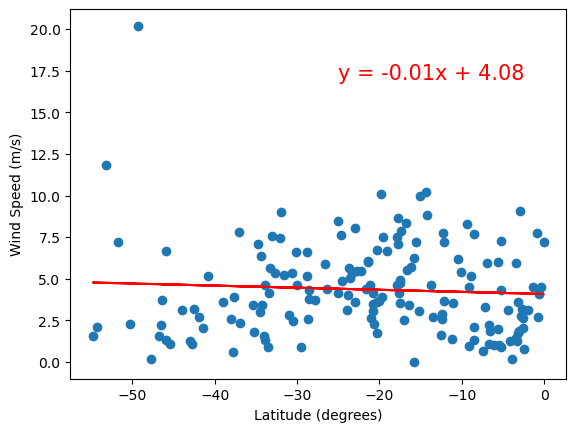

In [90]:
# Southern Hemisphere
plot_linreg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], 'Wind Speed (m/s)', (-25, 17))

**Discussion about the linear relationship:**
- The 'Wind Speed' plots are similar to the 'Cloudiness' and 'Humidity' plots for both hemispheres.  Both r-values are close to 0, therefore no correlation between a city's wind speed and its latitude.